In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
corpus=[]
with open('Show me the meaning.txt','r',encoding='utf-8',) as meaning:
  print(type(meaning))
  file_data=meaning.readlines()
  for lines in file_data:
    corpus.append(lines[:-1])
    
    


<class '_io.TextIOWrapper'>


In [6]:
corpus

['Show me the meaning of being lonely',
 'So many words for the broken heart',
 "It's hard to see in a crimson love",
 'So hard to breathe',
 'Walk with me, and maybe',
 'Nights of light so soon become',
 'Wild and free I could feel the sun',
 'Your every wish will be done',
 'They tell me',
 'Show me the meaning of being lonely',
 'Is this the feeling I need to walk with?',
 "Tell me why I can't be there where you are",
 "There's something missing in my heart",
 'Life goes on as it never ends',
 'Eyes of stone observe the trends',
 'They never say forever gaze upon me',
 'Guilty roads to an endless love (endless love)',
 "There's no control",
 'Are you with me now?',
 'Your every wish will be done',
 'They tell me',
 'Show me the meaning of being lonely',
 'Is this the feeling I need to walk with?',
 "(Tell me why) tell me why I can't be there where you are",
 "There's something missing in my heart",
 "There's nowhere to run",
 'I have no place to go',
 'Surrender my heart, body, and 

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [0]:
token=Tokenizer()
token.fit_on_texts(corpus)
word_index=token.word_index

In [0]:
vocab_size=len(word_index) + 1

In [10]:
vocab_size

95

In [11]:
word_index

{'a': 51,
 'an': 78,
 'and': 32,
 'are': 7,
 'as': 66,
 'asking': 92,
 'be': 8,
 'become': 58,
 'being': 13,
 'body': 87,
 'breathe': 53,
 'broken': 48,
 'can': 90,
 "can't": 22,
 'control': 79,
 'could': 61,
 'crimson': 52,
 'done': 41,
 'endless': 43,
 'ends': 67,
 'every': 38,
 'eyes': 68,
 'feel': 36,
 'feeling': 27,
 'for': 47,
 'forever': 73,
 'free': 60,
 'gaze': 74,
 'go': 85,
 'goes': 64,
 'guilty': 76,
 'hard': 35,
 'have': 83,
 'hear': 94,
 'heart': 15,
 'how': 89,
 'i': 3,
 'in': 16,
 'is': 25,
 'it': 42,
 "it's": 49,
 'life': 63,
 'light': 56,
 'lonely': 14,
 'love': 31,
 'many': 45,
 'maybe': 54,
 'me': 1,
 'meaning': 20,
 'missing': 24,
 'my': 19,
 'need': 28,
 'never': 34,
 'nights': 55,
 'no': 44,
 'now': 80,
 'nowhere': 81,
 'observe': 70,
 'of': 10,
 'on': 65,
 'place': 84,
 'roads': 77,
 'run': 82,
 'say': 72,
 'see': 50,
 'show': 12,
 'so': 30,
 'something': 29,
 'soon': 57,
 'soul': 88,
 'stone': 69,
 'sun': 62,
 'surrender': 86,
 'tell': 5,
 'the': 2,
 'there': 2

In [12]:
word_index['no']

44

In [0]:
corpus_seq=token.texts_to_sequences(corpus)

In [14]:
corpus_seq[:10]

[[12, 1, 2, 20, 10, 13, 14],
 [30, 45, 46, 47, 2, 48, 15],
 [49, 35, 4, 50, 16, 51, 52, 31],
 [30, 35, 4, 53],
 [21, 17, 1, 32, 54],
 [55, 10, 56, 30, 57, 58],
 [59, 32, 60, 3, 61, 36, 2, 62],
 [37, 38, 39, 40, 8, 41],
 [33, 5, 1],
 [12, 1, 2, 20, 10, 13, 14]]

In [0]:
### WE will crete the incremental lists from a sentence
corpus_increment=[]
for lines in corpus_seq:
  for i in range(2,len(lines)+1):
    increment=lines[:i]
    corpus_increment.append(increment)


In [16]:
corpus_increment[:10]

[[12, 1],
 [12, 1, 2],
 [12, 1, 2, 20],
 [12, 1, 2, 20, 10],
 [12, 1, 2, 20, 10, 13],
 [12, 1, 2, 20, 10, 13, 14],
 [30, 45],
 [30, 45, 46],
 [30, 45, 46, 47],
 [30, 45, 46, 47, 2]]

In [0]:
#Finding the maxlength
max_length=0
for i in corpus_seq:
  if len(i) > max_length:
    max_length = len(i)

In [18]:
max_length

16

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
corpus_pad=pad_sequences(corpus_increment,maxlen=max_length,padding='pre')

In [21]:
corpus_pad.shape

(249, 16)

In [22]:
corpus_pad[:5]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  1,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  1,  2, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  1,  2, 20, 10],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  1,  2, 20, 10, 13]],
      dtype=int32)

In [0]:
corpus_data=corpus_pad[:,:-1]
corpus_label=corpus_pad[:,-1]

In [24]:
corpus_data[:5]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  1,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  1,  2, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  1,  2, 20, 10]],
      dtype=int32)

In [25]:
corpus_data.shape

(249, 15)

In [0]:
##Converting Labes into categorical
from tensorflow.keras.utils import to_categorical

In [0]:
traning_labels=to_categorical(corpus_label,num_classes=vocab_size)

In [0]:
from tensorflow.keras.layers import Dense,Embedding,LSTM

In [31]:
### Trian the model
model=keras.Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_length-1,))
model.add(LSTM(64))
model.add(Dense(vocab_size,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 64)            6080      
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 95)                6175      
Total params: 45,279
Trainable params: 45,279
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(corpus_data,traning_labels,epochs=500)

Epoch 1/300
8/8 [==============================] - 0s 7ms/step - loss: 4.5538 - accuracy: 0.0201
Epoch 2/300
8/8 [==============================] - 0s 7ms/step - loss: 4.5537 - accuracy: 0.1044
Epoch 3/300
8/8 [==============================] - 0s 6ms/step - loss: 4.5534 - accuracy: 0.1325
Epoch 4/300
8/8 [==============================] - 0s 7ms/step - loss: 4.5530 - accuracy: 0.0924
Epoch 5/300
8/8 [==============================] - 0s 7ms/step - loss: 4.5520 - accuracy: 0.0803
Epoch 6/300
8/8 [==============================] - 0s 6ms/step - loss: 4.5497 - accuracy: 0.0763
Epoch 7/300
8/8 [==============================] - 0s 7ms/step - loss: 4.5451 - accuracy: 0.0763
Epoch 8/300
8/8 [==============================] - 0s 6ms/step - loss: 4.5357 - accuracy: 0.0763
Epoch 9/300
8/8 [==============================] - 0s 6ms/step - loss: 4.5246 - accuracy: 0.0763
Epoch 10/300
8/8 [==============================] - 0s 7ms/step - loss: 4.5123 - accuracy: 0.0763
Epoch 11/300
8/8 [===========

In [0]:
### Lets plot the accuracy
history=model.history.history
acc=history['accuracy']

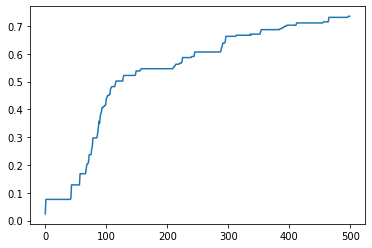

In [38]:
plt.plot(acc)

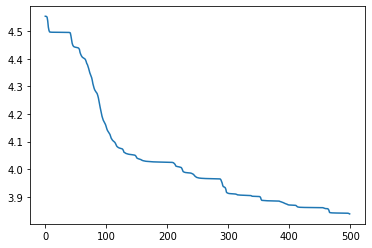

In [39]:
loss=history['loss']
plt.plot(loss)

In [0]:
#### Summay: It might reduce if we increase the epochs.

In [0]:
### For prediction lets reverse the word_index
inverse_index={w:i for i,w in word_index.items()}

In [0]:
### Now lets predict some words.
text='Walk with me'
text_list=[text]
text_seq=token.texts_to_sequences(text_list)
text_pad=pad_sequences(text_seq,maxlen=max_length,padding='pre')
prediction=model.predict(text_pad).argmax()
predict_word=inverse_index[prediction]
predict_text=text + ' ' + predict_word

In [47]:
predict_text

'Walk with me the'

In [0]:
### Now lets predict 50 words
text='Show me the '
text_list=[text]
for i in range(50):
  
  text_seq=token.texts_to_sequences(text_list)
  text_pad=pad_sequences(text_seq,maxlen=max_length,padding='pre')
  prediction=model.predict(text_pad).argmax()
  predict_word=inverse_index[prediction]
  text=text + ' ' + predict_word
  text_list=[text]


In [55]:
text

'Show me the  meaning of being lonely being lonely being lonely being lonely being lonely being being heart forever feeling body me soul meaning being heart forever being heart being heart where you are where you you you you you are and soul show show me the feeling i need to walk with'